In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.6 MB/s eta 0:00:00


In [ ]:
!pip install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10370 sha256=d920a236051ba4d429f1e059a6e0c7a10d033bf0b2648b6cf9746ce5c79faa5f
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
!git clone https://github.com/cnmberches/face-detection

Cloning into 'face-detection'...
remote: Enumerating objects: 9812, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 9812 (delta 17), reused 92 (delta 14), pack-reused 9702
Receiving objects: 100% (9812/9812), 152.24 MiB | 18.12 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Updating files: 100% (9664/9664), done.


In [ ]:
pip install fightingcv-attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.0/144.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fightingcv-attention: filename=fightingcv_attention-1.0.0-py3-none-any.whl size=176389 sha256=65c179e596623d5049126b8c494f9caac80649c2e9033c84a94a50249787bee2
  Stored in directory: /root/.cache/pip/wheels/53/7e/7b/036eed7e0f725b364f87bddf308d946c3336928216ad6d92e6
Successfully built fightingcv-attention


In [ ]:
!git clone https://github.com/xmu-xiaoma666/External-Attention-pytorch.git

Cloning into 'External-Attention-pytorch'...
remote: Enumerating objects: 1682, done.
remote: Counting objects: 100% (535/535), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 1682 (delta 335), reused 382 (delta 313), pack-reused 1147
Receiving objects: 100% (1682/1682), 5.54 MiB | 9.47 MiB/s, done.
Resolving deltas: 100% (998/998), done.


In [ ]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from keras_facenet import FaceNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import load_model
from keras.utils import to_categorical
from tensorflow.keras.layers import Concatenate, Dense

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import os

**MTCNN MODEL**

In [ ]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
    

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr
    

    def load_faces(self, dir):
        FACES = []
        counter = 0
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
                counter += 1
                if counter >= 20:
                  break
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
          path = self.directory +'/'+ sub_dir+'/'
          FACES = self.load_faces(path)
          labels = [self.directory.replace("/content/face-detection/datasets/", "") for _ in range(len(FACES))]
          print(labels)
          print(f"Loaded successfully: {len(labels)}")
          self.X.extend(FACES)
          self.Y.extend(labels)
        
        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [ ]:
# Specify the directory path
directory = '/content/face-detection/datasets'

# Get a list of items in the directory
items = os.listdir(directory)

X, Y = [], []

# Loop through the items
for item in items:
    # Get the full path of the item
    item_path = os.path.join(directory, item)
    
    # Check if the item is a folder/directory
    if os.path.isdir(item_path):
      print(item_path)
      faceloading = FACELOADING(item_path)
      faces, labels = faceloading.load_classes()
      X.append(faces)
      Y.append(labels)
    
X = np.concatenate(X, axis=0)
Y = np.concatenate(Y, axis=0)

/content/face-detection/datasets/1025_JhonCedric_delaPena
1/1 [==============================] - 0s 22ms/step


KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(5,250))
for num,image in enumerate(X[:80]):
    ncols = 4
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

**PART 2: FACENET MODEL**

In [ ]:
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0) 
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [ ]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

In [ ]:
np.savez_compressed('faces_embeddings_done_4classe_.npz', EMBEDDED_X, Y)

**PART 3: SVM MODEL**

In [ ]:
#Run to save time in running MTCNN and FACENET
faces_embeddings = np.load("/content/face-detection/faces_embeddings_done_4classes.npz")
EMBEDDED_X, Y = faces_embeddings['arr_0'], faces_embeddings['arr_1']

Text(0, 0.5, '1025_JhonCedric_delaPena')

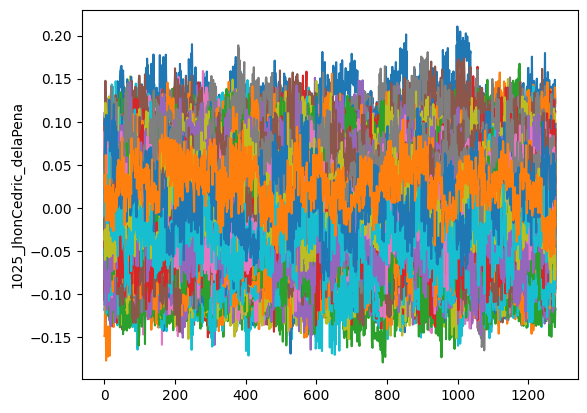

In [ ]:
plt.plot(EMBEDDED_X) 
plt.ylabel(Y[0])

In [ ]:
encoder = LabelEncoder()
Y_enc = encoder.fit_transform(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y_enc, shuffle=True, random_state=17)

In [ ]:
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, ypreds_test)
precision = precision_score(Y_test, ypreds_test, average='macro')
recall = recall_score(Y_test, ypreds_test, average='macro')
f1 = f1_score(Y_test, ypreds_test, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


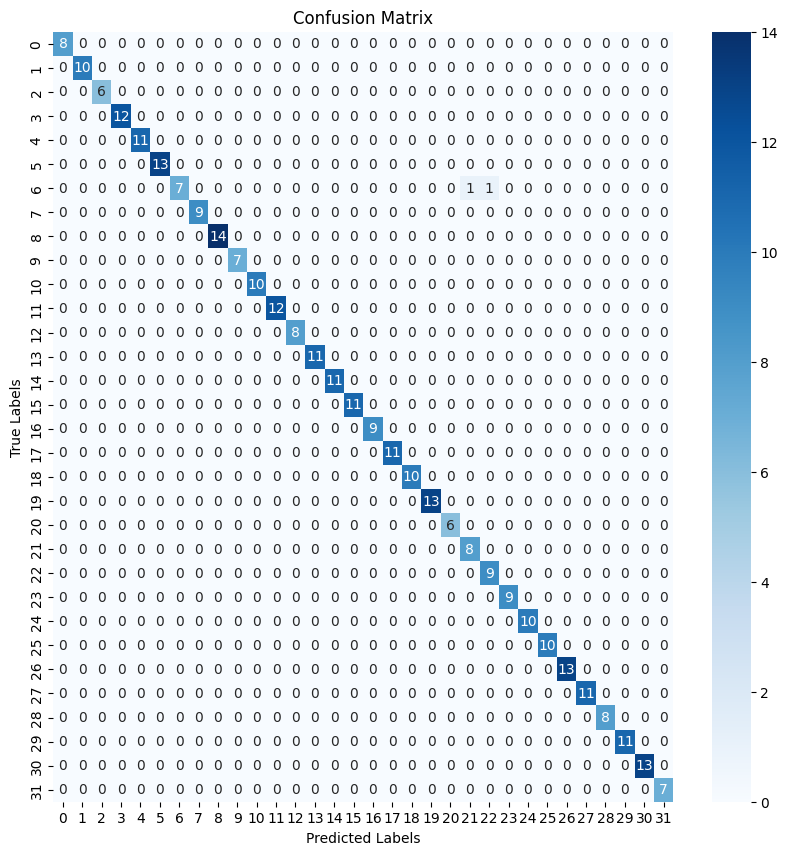

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(Y_test, ypreds_test)

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
# Rotate y-axis labels by 90 degrees
plt.yticks(rotation=90)

plt.show()

**Test**

In [ ]:
detector = MTCNN()
 
t_im = cv.imread("/content/face-detection/individual_test/5jayden.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

1/1 [==============================] - 0s 160ms/step


In [ ]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 [==============================] - 0s 108ms/step


In [ ]:
test_im.shape

(512,)

In [ ]:
ypreds = model.predict(test_im.reshape(1, -1))
print(ypreds)

[26]


**EXPORT MODEL, CBAM, AND ENCODER**

In [ ]:
import pickle

pickle.dump(model, open('svc_model.pkl', 'wb'))
pickle.dump(encoder, open('encoder.pkl', 'wb'))

**IMPOSTOR DATASET**

In [ ]:
# Initialize the face detector
detector = MTCNN()

# Specify the directory containing the images
directory = '/content/face-detection/impostor_images'

X_val_imp_raw = []
Y_val_imp_raw = []

# Loop through the images in the directory
for filename in os.listdir(directory):
    # Read the image
    filepath = os.path.join(directory, filename)
    sub_directory = filepath
    FACES = []
    for images in os.listdir(sub_directory):
      img_dir = os.path.join(sub_directory, images)
      t_im = cv.imread(img_dir)
      print(img_dir)
      t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
      x,y,w,h = detector.detect_faces(t_im)[0]['box']
      x,y = abs(x), abs(y)
      face = t_im[y:y+h, x:x+w]
      face_arr = cv.resize(face, (160,160))
      FACES.append(face_arr)
      labels = [sub_directory.replace("content/face-detection/impostor_images/", "") for _ in range(len(FACES))]

      X_val_imp_raw.append(FACES)
      Y_val_imp_raw.append(labels)

X_val_imp = np.concatenate(X_val_imp_raw, axis=0)
Y_val_imp = np.concatenate(Y_val_imp_raw, axis=0)
print(X_val_imp.shape)
print(Y_val_imp.shape)

/content/face-detection/impostor_images/Descery_Briguera/2.jpg
1/1 [==============================] - 0s 143ms/step
/content/face-detection/impostor_images/Descery_Briguera/5.jpg
1/1 [==============================] - 0s 29ms/step
/content/face-detection/impostor_images/Descery_Briguera/4.jpg
1/1 [==============================] - 0s 49ms/step
/content/face-detection/impostor_images/Descery_Briguera/3.jpg
1/1 [==============================] - 0s 29ms/step
/content/face-detection/impostor_images/Descery_Briguera/1.jpg
1/1 [==============================] - 0s 53ms/step
/content/face-detection/impostor_images/Nestly_Dianne_Denna/2.jpg
1/1 [==============================] - 0s 49ms/step
/content/face-detection/impostor_images/Nestly_Dianne_Denna/5.jpg
1/1 [==============================] - 0s 39ms/step
/content/face-detection/impostor_images/Nestly_Dianne_Denna/4.jpg
1/1 [==============================] - 0s 34ms/step
/content/face-detection/impostor_images/Nestly_Dianne_Denna/3.jpg
1/1 

In [ ]:
EMBEDDED_X_val_imp = []

for img in X_val_imp:
    EMBEDDED_X_val_imp.append(get_embedding(img))

EMBEDDED_X_val_imp = np.asarray(EMBEDDED_X_val_imp)

1/1 [==============================] - 0s 194ms/step


In [ ]:
X_val_np_test_imp = EMBEDDED_X_val_imp
y_pred_imp = model.predict(X_val_np_test_imp)
y_pred_proba_imp = model.predict_proba(X_val_np_test_imp)

**GENUINE DATASET**

In [ ]:
# Initialize the face detector
detector = MTCNN()

# Specify the directory containing the images
directory = '/content/face-detection/genuine_dataset'

X_val_gen_raw = []
Y_val_gen_raw = []

# Loop through the images in the directory
for filename in os.listdir(directory):
    # Read the image
    filepath = os.path.join(directory, filename)
    sub_directory = filepath
    FACES = []
    for images in os.listdir(sub_directory):
      img_dir = os.path.join(sub_directory, images)
      t_im = cv.imread(img_dir)
      print(img_dir)
      t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
      x,y,w,h = detector.detect_faces(t_im)[0]['box']
      x,y = abs(x), abs(y)
      face = t_im[y:y+h, x:x+w]
      face_arr = cv.resize(face, (160,160))
      FACES.append(face_arr)
      labels = [sub_directory.replace("content/face-detection/impostor_images/", "") for _ in range(len(FACES))]

      X_val_gen_raw.append(FACES)
      Y_val_gen_raw.append(labels)

X_val_gen = np.concatenate(X_val_gen_raw, axis=0)
Y_val_gen = np.concatenate(Y_val_gen_raw, axis=0)
print(X_val_gen.shape)
print(Y_val_gen.shape)

/content/face-detection/genuine_dataset/1002_Arjohn_Aragon/5.jpg
1/1 [==============================] - 0s 151ms/step
/content/face-detection/genuine_dataset/1002_Arjohn_Aragon/4.jpg
1/1 [==============================] - 0s 43ms/step
/content/face-detection/genuine_dataset/1002_Arjohn_Aragon/6.jpg
1/1 [==============================] - 0s 68ms/step
/content/face-detection/genuine_dataset/1002_Arjohn_Aragon/3.jpg
1/1 [==============================] - 0s 78ms/step
/content/face-detection/genuine_dataset/1002_Arjohn_Aragon/1.jpg
1/1 [==============================] - 0s 34ms/step
/content/face-detection/genuine_dataset/1001_Maica_Guinanao/2.jpg
1/1 [==============================] - 0s 63ms/step
/content/face-detection/genuine_dataset/1001_Maica_Guinanao/5.jpg
1/1 [==============================] - 0s 89ms/step
/content/face-detection/genuine_dataset/1001_Maica_Guinanao/4.jpg
1/1 [==============================] - 0s 127ms/step
/content/face-detection/genuine_dataset/1001_Maica_Guinanao

In [ ]:
EMBEDDED_X_val_gen = []

for img in X_val_gen:
    EMBEDDED_X_val_gen.append(get_embedding(img))

EMBEDDED_X_val_gen = np.asarray(EMBEDDED_X_val_gen)

1/1 [==============================] - 0s 97ms/step


In [ ]:
X_val_np_test_gen = EMBEDDED_X_val_gen
y_pred_gen = model.predict(EMBEDDED_X_val_gen)
y_pred_proba_gen = model.predict_proba(X_val_np_test_gen)

In [ ]:
import pandas as pd

In [ ]:
far = pd.DataFrame(columns=["threshold", "count"])
for i in range(100):
  accepted = 0
  threshold = i /100
  for pred_proba in y_pred_proba_gen:
    y_pred_proba_gen_max = np.max(pred_proba)
    if y_pred_proba_gen_max >= threshold:
      accepted = accepted + 1
  new_row = {"threshold": threshold, "count": accepted}
  far = far.append(new_row, ignore_index=True)

<ipython-input-64-ea7f6a8c070b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  far = far.append(new_row, ignore_index=True)
<ipython-input-64-ea7f6a8c070b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  far = far.append(new_row, ignore_index=True)
<ipython-input-64-ea7f6a8c070b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  far = far.append(new_row, ignore_index=True)
<ipython-input-64-ea7f6a8c070b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  far = far.append(new_row, ignore_index=True)
<ipython-input-64-ea7f6a8c070b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

In [ ]:
frr = pd.DataFrame(columns=["threshold", "count"])
for i in range(100):
  accepted = 0
  threshold = i /100
  for pred_proba in y_pred_proba_imp:
    y_pred_proba_gen_max = np.max(pred_proba)
    if y_pred_proba_gen_max <= threshold:
      accepted = accepted + 1
  new_row = {"threshold": threshold, "count": accepted}
  frr = frr.append(new_row, ignore_index=True)

<ipython-input-65-52f419d9f9f0>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frr = frr.append(new_row, ignore_index=True)
<ipython-input-65-52f419d9f9f0>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frr = frr.append(new_row, ignore_index=True)
<ipython-input-65-52f419d9f9f0>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frr = frr.append(new_row, ignore_index=True)
<ipython-input-65-52f419d9f9f0>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frr = frr.append(new_row, ignore_index=True)
<ipython-input-65-52f419d9f9f0>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

<Figure size 640x480 with 0 Axes>

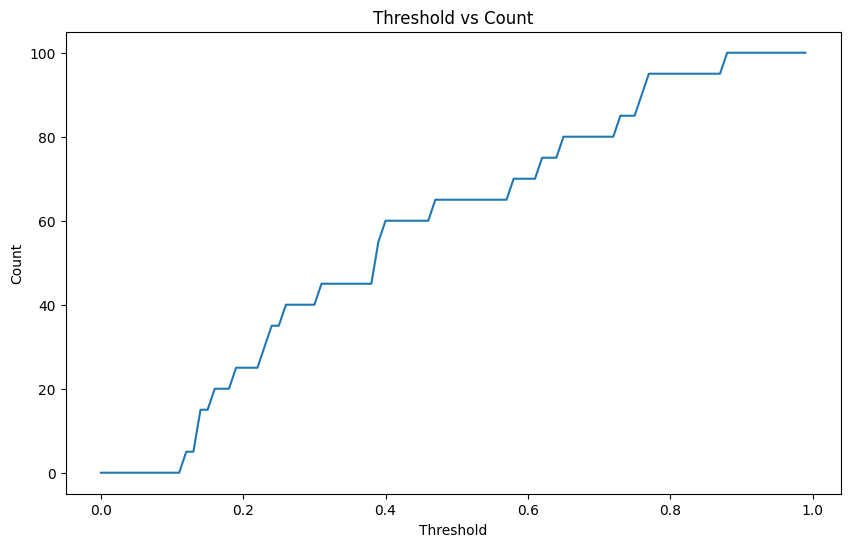

In [ ]:
plt.clf()
plt.figure(figsize=(10, 6)) 
plt.plot(frr["threshold"], frr["count"], linestyle='-')

# Set plot title and labels
plt.title("Threshold vs Count")
plt.xlabel("Threshold")
plt.ylabel("Count")
# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

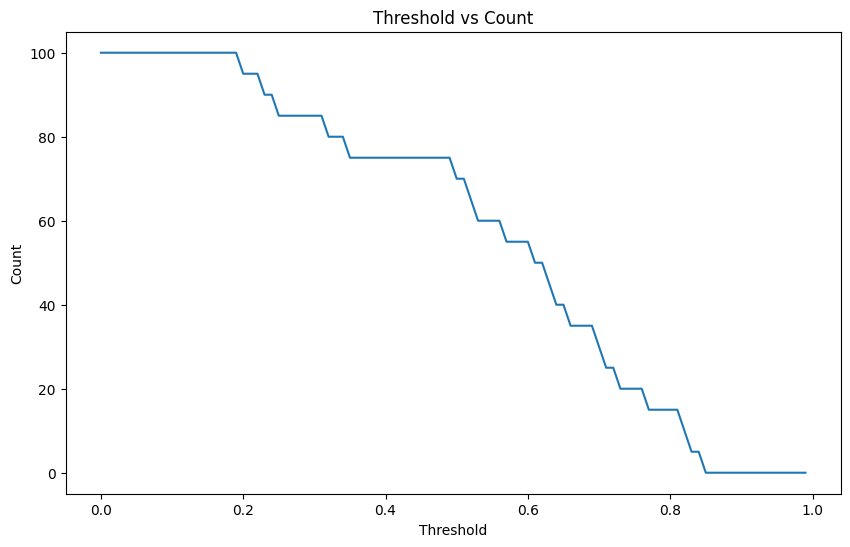

In [ ]:
plt.clf()
plt.figure(figsize=(10, 6)) 
plt.plot(far["threshold"], far["count"], linestyle='-')

# Set plot title and labels
plt.title("Threshold vs Count")
plt.xlabel("Threshold")
plt.ylabel("Count")
# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

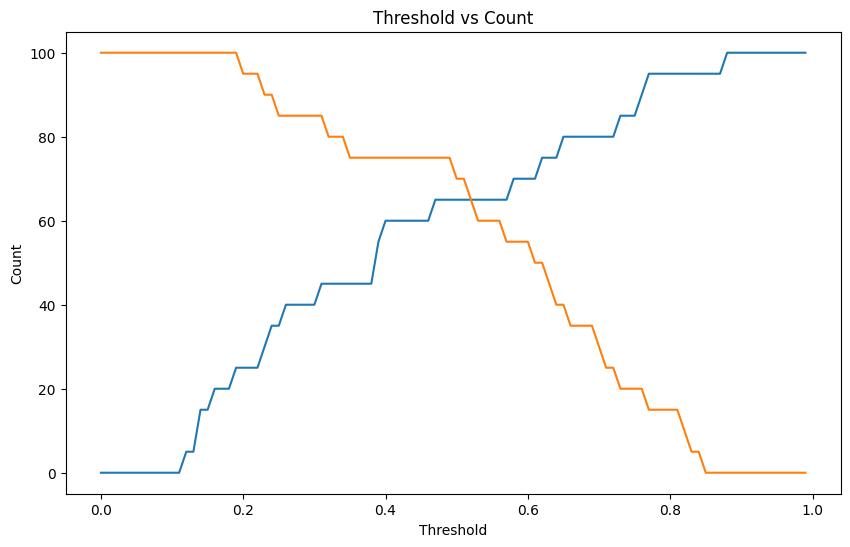

In [ ]:
plt.clf()
plt.figure(figsize=(10, 6)) 
plt.plot(frr["threshold"], frr["count"], linestyle='-')
plt.plot(far["threshold"], far["count"], linestyle='-')

# Set plot title and labels
plt.title("Threshold vs Count")
plt.xlabel("Threshold")
plt.ylabel("Count")
# Show the plot
plt.show()